In [ ]:
# Build a logistic regression model to predict March Madness games 2018

Goal

The purpose of this project is to predict results of March Madness games based on historical data of each game from 2002 to 2017 ,using logistic regression algrithms.

Data

The original dataset includes teams' performance of each game played in March Madness from 2002 to 2017. This data I used includes the difference between data of team1's and team2's performance. 

Dependent variable is the result of game. 1 means team1 win, and 0 means team2 loss. 

Independent variables:

Adjde: Adjusted defense efficiency 

Adjoe: An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average D-I defense.

Adjtempo: An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average D-I tempo.

Arate: Assists divided by field goals made.  Percentage of field goals that were preceded by an assist.

Blockpct: Blocked shots divided by opponents 2 point field goal attempts

De: Points allowed per 100 defensive possessions.

F3grate: Percentage of field goal attempts that are 3 point field goal attempts. 

Fg2pct: Shooting percentage on 2 point field goals. 

Fg3pct: Shooting percentage on 3 point field goals.

Ftpct: Shooting percentage on free throws.

Oe: Points scored per 100 offensive possessions.

Opparate: Opponent’s Assists divided by opponent’s field goals made.

Oppblockpct: Opponent’s blocked shots divided by 2 point field goal attempts.

Oppf3grate: Percentage of opponent’s field goal attempts that are 3 point field goal attempts. 

Oppfg2pct: Opponent’s shooting percentage on 2 point field goals.

Oppfg3pct: Opponent’s shooting percentage on 3 point field goals. 

Oppftpct: Opponent’s shooting percentage on free throws.

Oppstlrate: Opponent’s steals divided by opponent’s defensive possessions. 

Rpi_rating: The RPI rating of each team

Seed_diff: seed in the tournament.  There are 4 brackets of teams seeded 1 through 16

Stlrate: Steals divided by defensive possessions. 

Temporate: Estimated possessions using this formula: FGA-OR+TO+0.475xFTA.  For each team, possessions are counted for the team and their opponents, and then averaged. A team’s average tempo is total possessions divided by minutes.

Preseason_winrate: preseason winning rate.

All the variables end with _diff mean the difference between team 1 and team 2.

Logistic Regression

I built logistic regression model with neural network mindset.

1.	Calculate sigmoid 

a.	Sigmoid(Z) = 1/(1+e^-z)

b.	Z stands for a scalar or numpy array of any size.

c.	Z = w*X+b

2.	Initialize parameters (w,b)

3.	Forward and backward propagation

a.	Calculate Activation

b.	Calculate Cost Function: -(y*log(a)+(1-y)*log(1-a))

c.	Calculate derivative of w and b

4.	Optimize 

a.	Update parameters using gradient descent

5.	Prediction

a.	Use learned (w,b) to predict the labels for a given set of examples

6.	Adjust learning-rate to maximize the accuracy


Results

The conclusive results show around 74% accuracy of training data and around 72% accuracy of testing data. Also, this is just a simple model, but logistic regression is very good to classify binary dataset. And this threshold is good for sports prediction.

Reference: Deep learning, Deeplearning.AI, Coursera



In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
data = pd.read_excel('C:\\Users\hugep\Documents\March Madness-new\March Madness 2018\Data\Data_generated.xlsx',sheet='Sheet1')
data.describe()

,Season,result,Adjde_diff,Adjoe_diff,Adjtempo_diff,Arate_diff,Blockpct_diff,De_diff,F3grate_diff,Fg2pct_diff,...,Oppf3grate_diff,Oppfg2pct_diff,Oppfg3pct_diff,Oppftpct_diff,Oppstlrate_diff,Rpi_rating_diff,Seed_diff,Stlrate_diff,Temporate_diff,Preseason_winrate_diff
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,2009.637780,0.523856,-0.396469,0.422502,0.068815,0.062566,-0.018963,-0.268363,-0.003269,-0.027288,...,-0.071892,-0.114511,0.032281,-0.037367,-0.012096,0.003320,-0.368062,0.017286,0.058518,0.054187
std,4.588448,0.499674,6.592531,8.269199,4.404344,7.006210,4.478236,6.209499,7.317074,3.918753,...,5.135270,3.936761,3.032085,3.070816,1.631654,0.542585,7.510543,2.433162,4.742147,1.418783
min,2002.000000,0.000000,-24.463900,-26.797900,-13.627600,-21.384200,-13.561300,-25.348300,-24.232300,-13.552600,...,-17.469500,-12.588966,-7.693400,-8.822100,-5.220000,-2.110000,-15.000000,-8.270000,-14.936700,-4.705882
25%,2006.000000,0.000000,-4.409000,-4.952650,-2.611100,-4.923950,-2.856514,-4.374000,-4.814950,-2.582400,...,-3.286206,-2.815100,-2.071300,-2.170650,-1.150000,-0.280000,-7.000000,-1.575000,-2.962050,-0.879685
50%,2010.000000,1.000000,-0.307900,0.438900,0.062500,0.182700,-0.035500,-0.112900,-0.121200,0.032900,...,0.004400,-0.186900,-0.043500,-0.061300,-0.020000,-0.010000,0.000000,-0.090000,0.087000,0.086207
75%,2014.000000,1.000000,3.707250,5.698450,2.773150,4.663050,2.866050,3.617050,5.070450,2.479950,...,3.213500,2.577150,2.202050,1.995300,1.060000,0.260000,5.000000,1.605000,3.037600,0.937500
max,2017.000000,1.000000,21.124800,26.866300,19.116500,21.929200,14.367700,18.460100,26.233000,13.383607,...,15.262600,12.526100,9.290500,10.170700,5.490000,1.950000,15.000000,9.100000,20.400900,5.757576


In [4]:
New_data=data.as_matrix()
np.random.shuffle(New_data)
Train_Y_1= New_data[:727,4:5]
Train_X_1= New_data[:727,5:]
Test_Y_1= New_data[727:,4:5]
Test_X_1= New_data[727:,5:]
Train_Y=Train_Y_1.T
Train_X=Train_X_1.T
Test_Y=Test_Y_1.T
Test_X=Test_X_1.T
m_train = Train_X.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Train_X shape: " + str(Train_X.shape))
print ("Train_y shape: " + str(Train_Y.shape))
print ('Test_x shape: '+str(Test_X.shape))
print ('Test_y shape: '+str(Test_Y.shape))

Number of training examples: 23
Train_X shape: (23, 727)
Train_y shape: (1, 727)
Test_x shape: (23, 300)
Test_y shape: (1, 300)


In [5]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    return s

In [6]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [7]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights
    b -- bias, a scalar
    X -- data of size (number of input variables, number of examples)
    Y -- true "label" vector (containing 0 if team1 loss, 1 if team1 win) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    z=np.array(np.dot(w.T,X)+b,dtype=np.float32)
    A = sigmoid(z)                                    # compute activation
    cost = -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m                                 # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m

    
    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [8]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w-learning_rate*dw
        b = b-learning_rate*d
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [9]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    z=np.array(np.dot(w.T, X)+b,dtype=np.float32)
    A = sigmoid(z)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    
    return Y_prediction


In [10]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict training data and testing data
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [11]:
d = model(Train_X, Train_Y, Test_X, Test_Y, num_iterations = 2000 , learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.514506
Cost after iteration 200: 0.511486
Cost after iteration 300: 0.509763
Cost after iteration 400: 0.508614
Cost after iteration 500: 0.507779
Cost after iteration 600: 0.507132
Cost after iteration 700: 0.506603
Cost after iteration 800: 0.506154
Cost after iteration 900: 0.505762
Cost after iteration 1000: 0.505410
Cost after iteration 1100: 0.505090
Cost after iteration 1200: 0.504794
Cost after iteration 1300: 0.504518
Cost after iteration 1400: 0.504260
Cost after iteration 1500: 0.504015
Cost after iteration 1600: 0.503783
Cost after iteration 1700: 0.503562
Cost after iteration 1800: 0.503351
Cost after iteration 1900: 0.503150
train accuracy: 73.86519944979366 %
test accuracy: 71.33333333333333 %


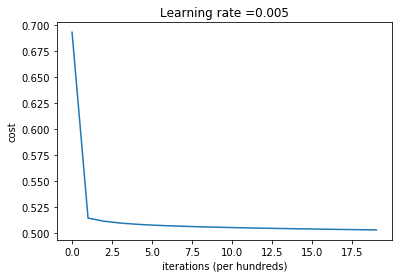

In [13]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.1
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.502955
Cost after iteration 200: 0.500312
Cost after iteration 300: 0.499028
Cost after iteration 400: 0.498393
Cost after iteration 500: 0.498076
Cost after iteration 600: 0.497917
Cost after iteration 700: 0.497836
Cost after iteration 800: 0.497795
Cost after iteration 900: 0.497774
Cost after iteration 1000: 0.497764
Cost after iteration 1100: 0.497758
Cost after iteration 1200: 0.497756
Cost after iteration 1300: 0.497754
Cost after iteration 1400: 0.497753
train accuracy: 74.27785419532324 %
test accuracy: 71.66666666666667 %

-------------------------------------------------------

learning rate is: 0.01
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.511477
Cost after iteration 200: 0.508610
Cost after iteration 300: 0.507130
Cost after iteration 400: 0.506153
Cost after iteration 500: 0.505409
Cost after iteration 600: 0.504794
Cost after iteration 700: 0.504259
Cost after iteration

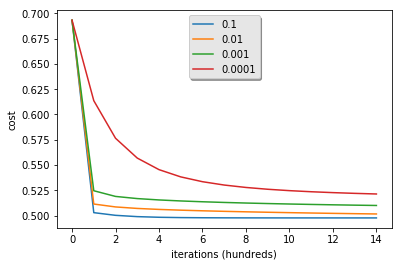

In [15]:
learning_rates = [0.1,0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(Train_X, Train_Y, Test_X, Test_Y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
